In [1]:
#Data loading and Preprocessing
import pandas as pd
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing

# Data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Data Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Train-and-Test-Split
from sklearn.model_selection import train_test_split

#importing Regression Libraries
from sklearn.linear_model import LogisticRegression

#To determine the accuracy of the model
from sklearn.metrics import jaccard_score

#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

#SVM analysis
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score



# Initial Data Analysis

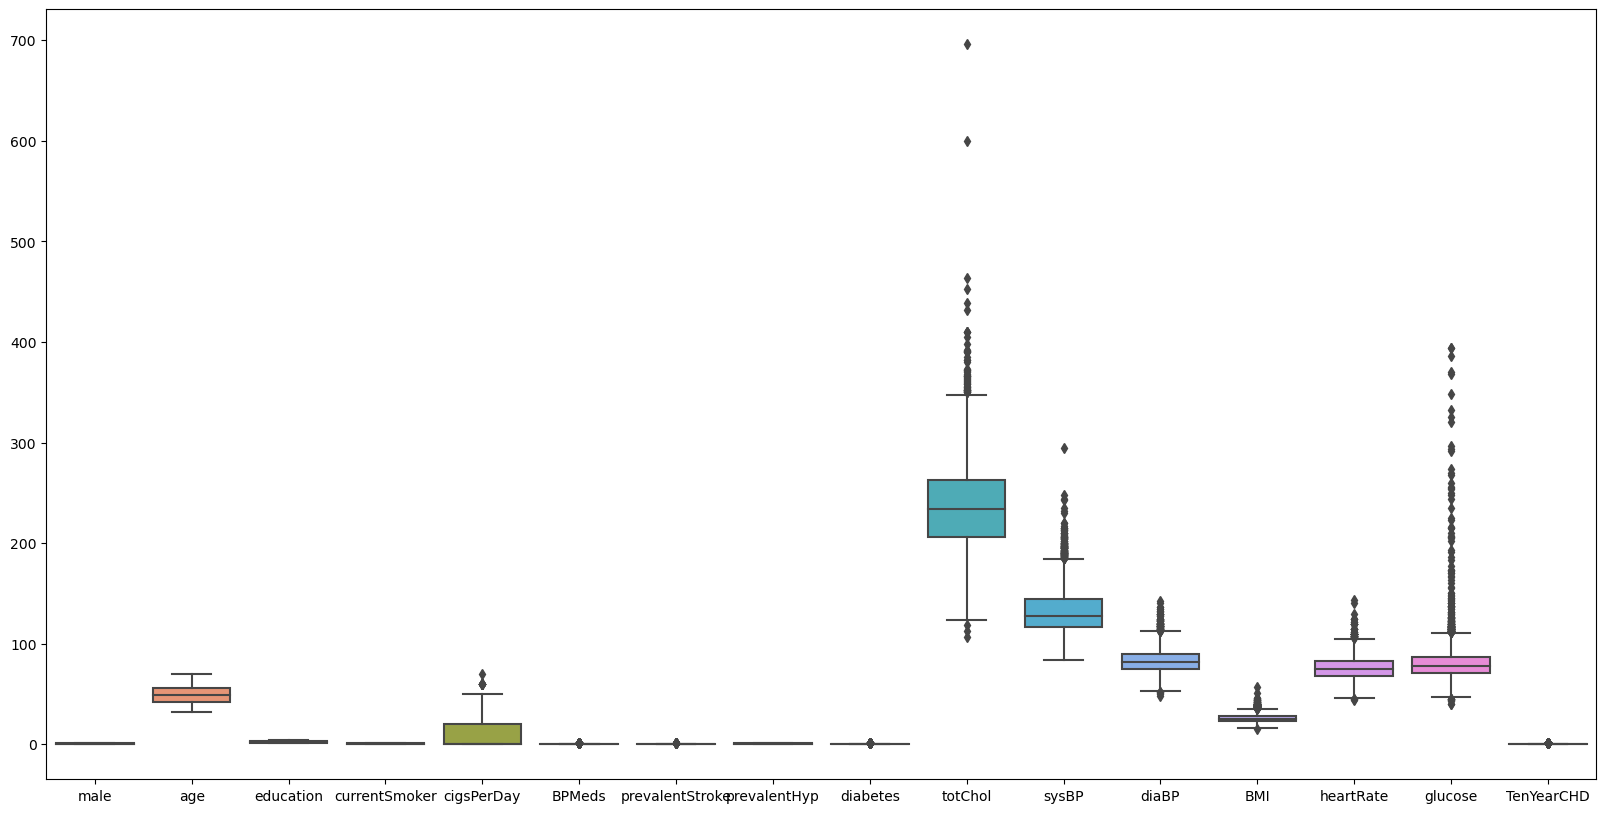

In [2]:
#dataset
disease_df = pd.read_csv("framingham.csv")

#Now plotting box and whisker plot
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=disease_df)
plt.show()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


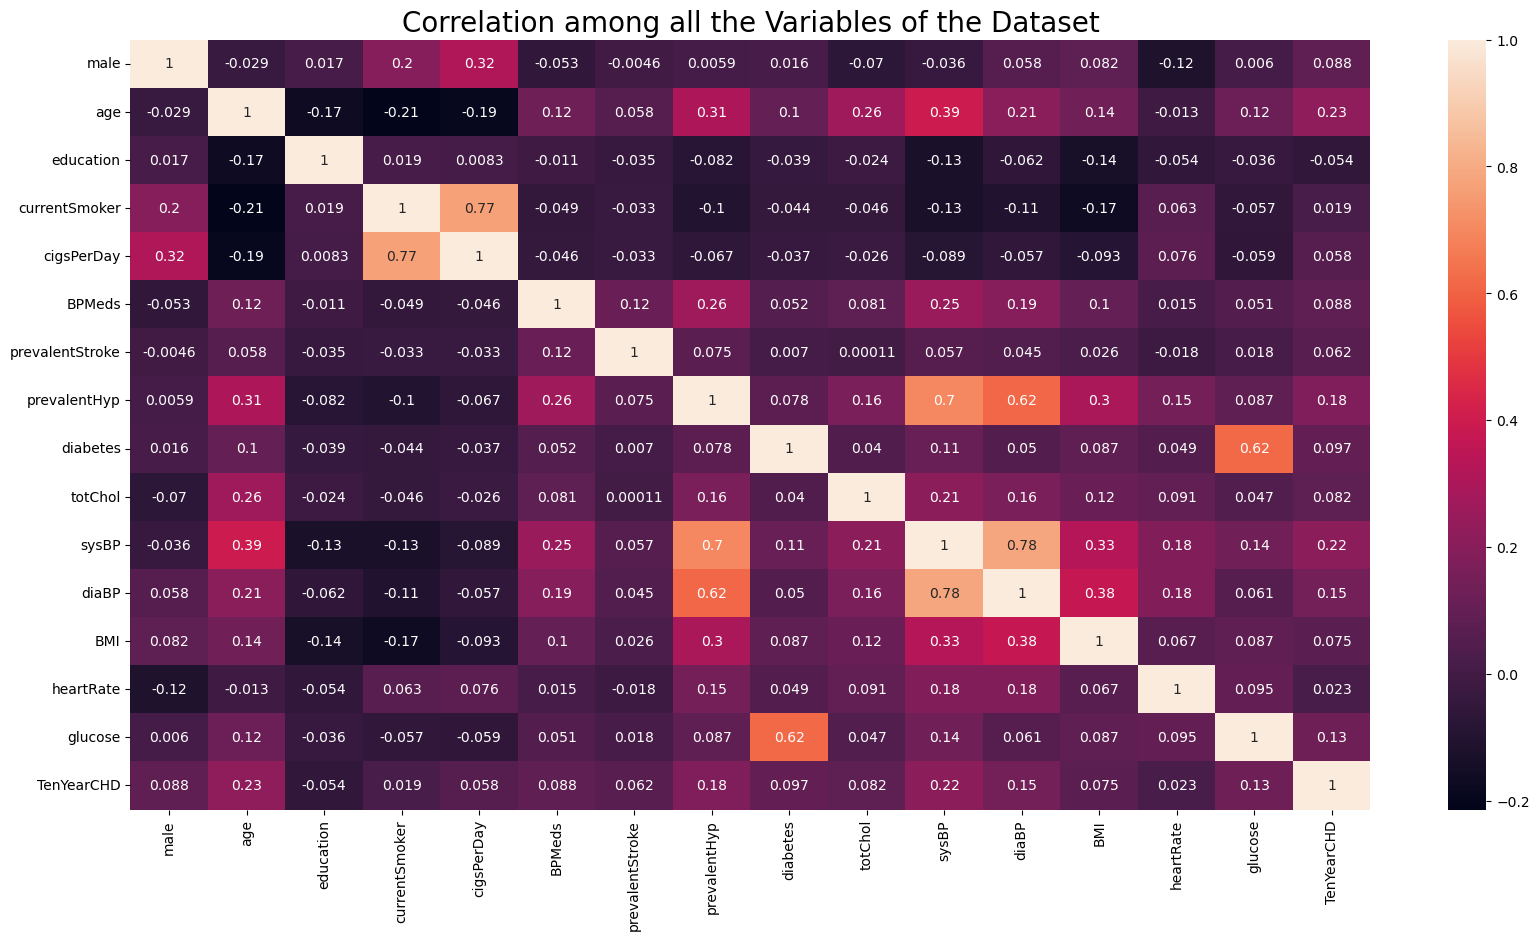

In [3]:
#Checking relationship between variables
cor=disease_df.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor
#We see that based on the independent dataset the correlation coefficient between education and the target variable TenYearCHD is very low and actually negative

In [4]:
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns = {'male' : 'Sex_male'}, inplace = True)
disease_df.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
#removing NaN/NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())
disease_df.isnull().sum()

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

Sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
disease_df.shape

(3751, 15)

In [7]:
disease_df.head(10)

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


### Which gender has more risk of coronary heart disease CHD

In [8]:
#checking for which gender has more risk of coronary heart disease CHD

graph = disease_df.groupby("Sex_male", as_index=False).TenYearCHD.sum()

### Which age group has more smokers

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

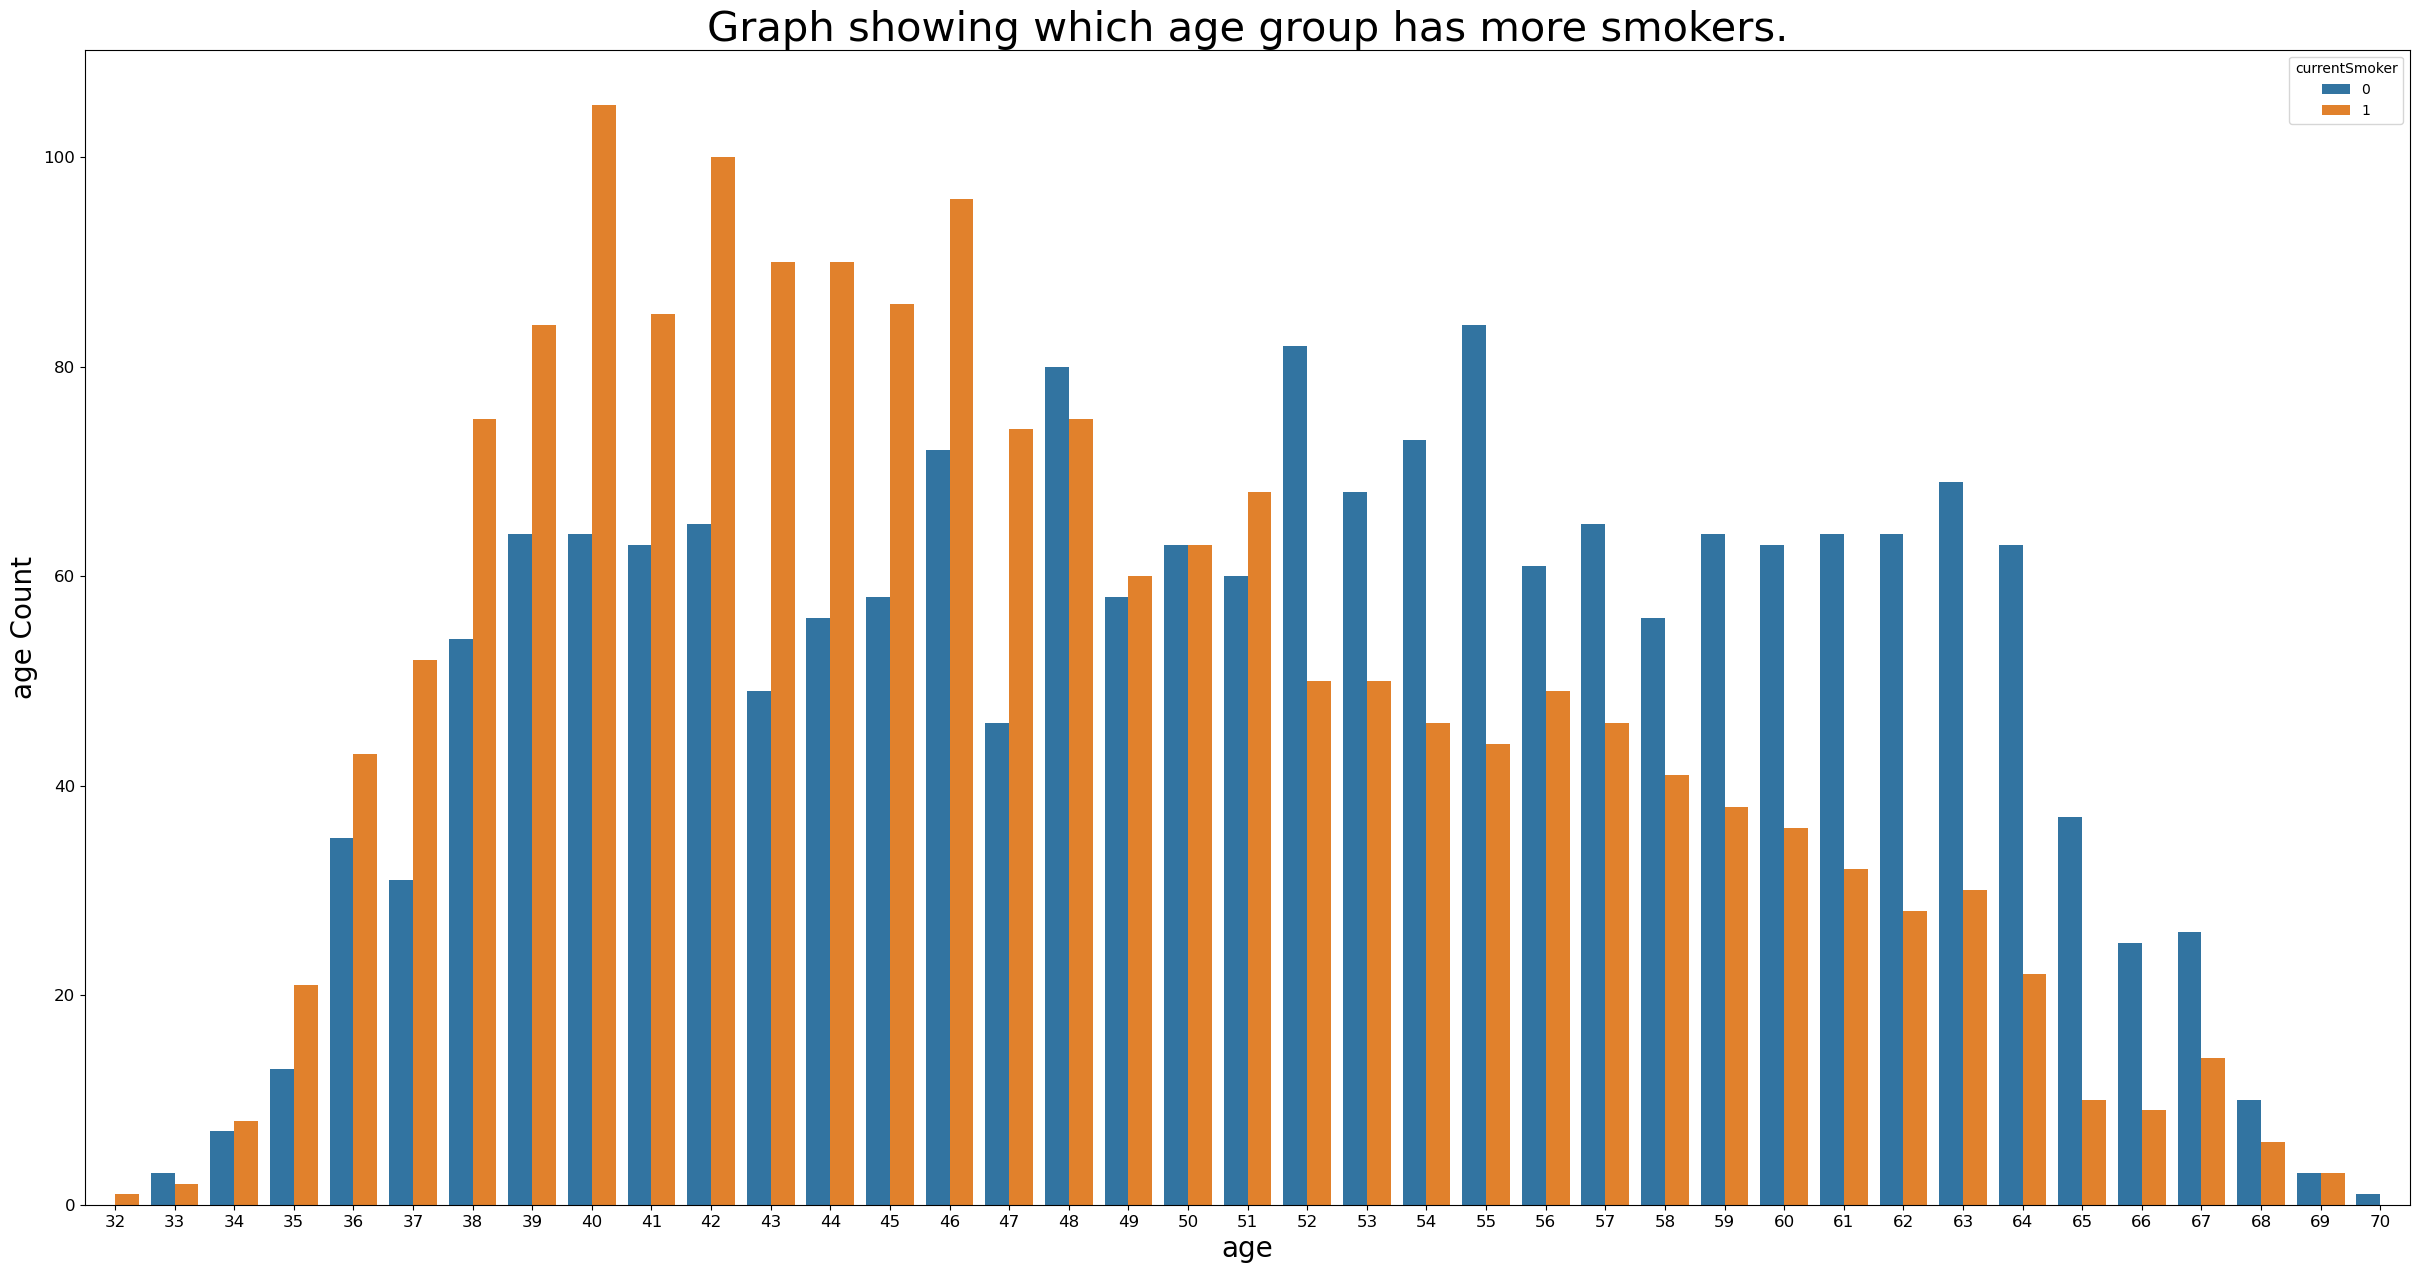

In [9]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=disease_df,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

### Relation between cigsPerDay and risk of coronary heart disease.

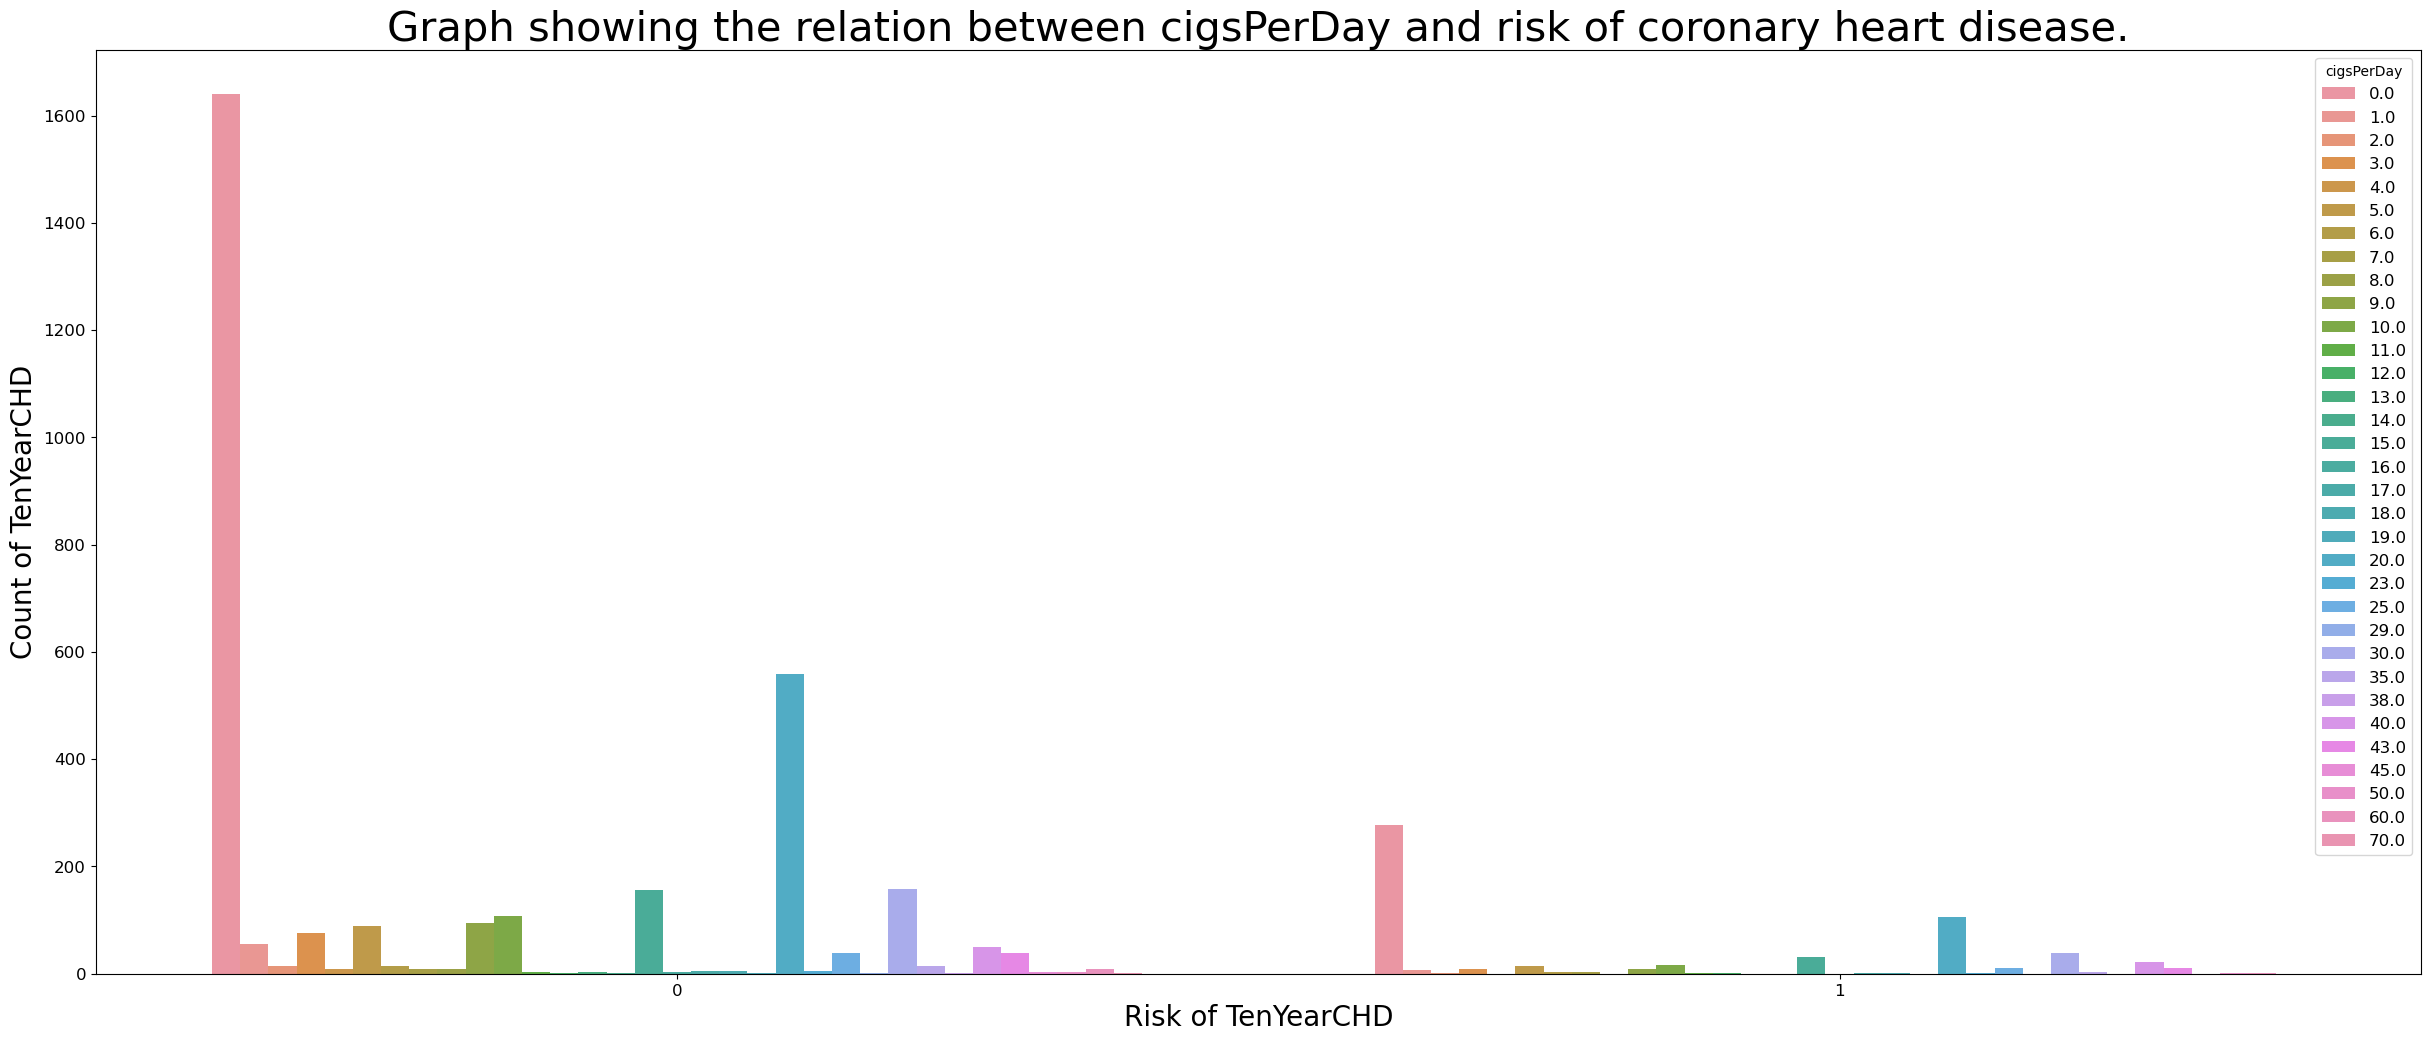

In [10]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=disease_df,hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350')])

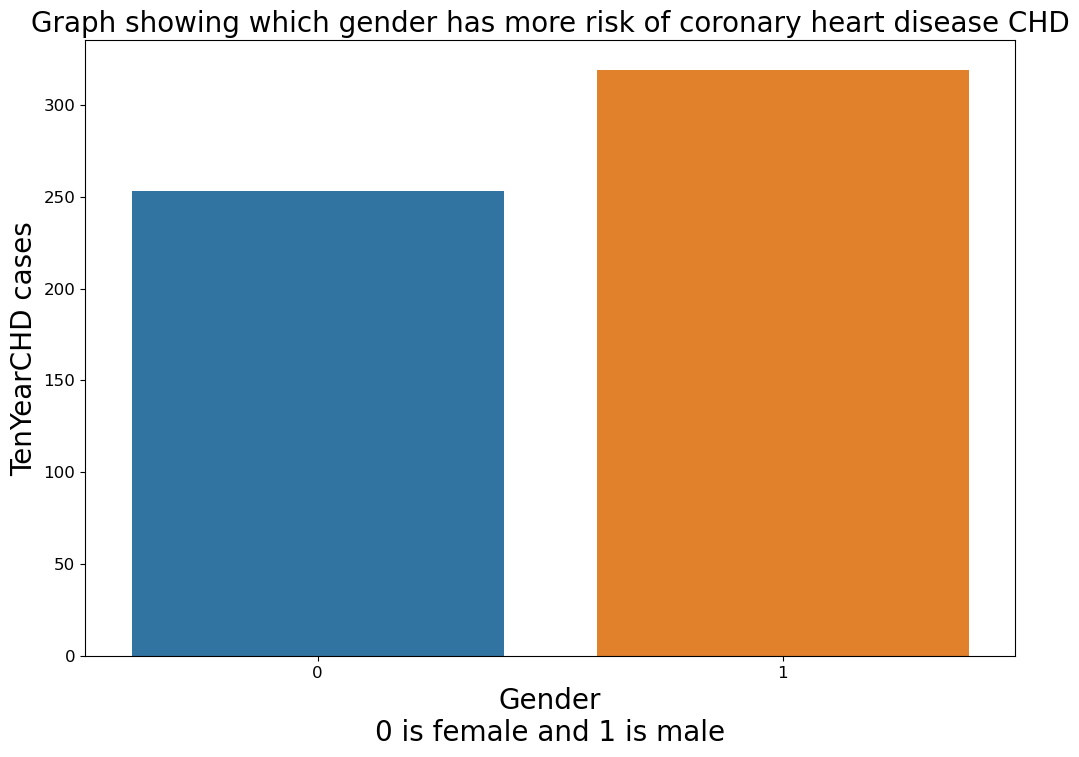

In [11]:
#Plotting the above values

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph["Sex_male"], y=graph["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

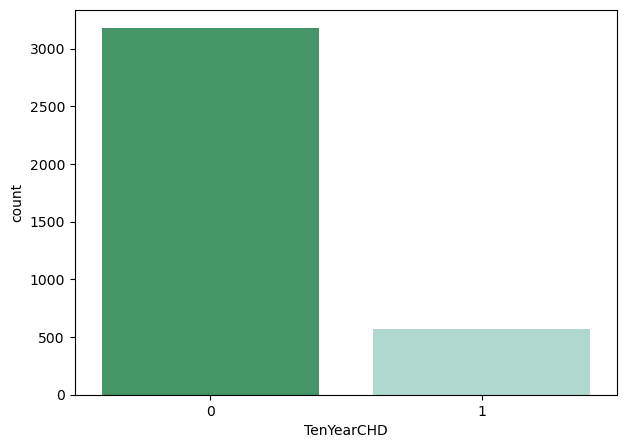

In [12]:
# counting the number of patients affected with CHD
plt.figure(figsize = (7,5))
sns.countplot(x = 'TenYearCHD', data = disease_df, palette = "BuGn_r")
plt.show()

# Predictive Modeling

#### We use the following different machine learning models for the dataset:

#### 1) Logistic Regression
#### 2) Random Forest Classification
#### 3) Decision Tree Classification 
#### 4) Support Vector Machine

## Logistic Regression

In [13]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'BPMeds', 'sysBP', 'glucose', 'diaBP', 'prevalentStroke', 'prevalentHyp', 'diabetes']]) ## add more columns as needed
y = np.asarray(disease_df['TenYearCHD'])

#normalization of the dataset
scaler = preprocessing.StandardScaler()
X = scaler.fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
## this row will split the dataset (X and y) into training set and testing dataset, where the train rows will be 70% and 30%

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (2625, 11) (2625,)
Test set: (1126, 11) (1126,)


In [14]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[946   5]
 [156  19]]


Accuracy of Logistic Regression: 85.70159857904085 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       951
           1       0.79      0.11      0.19       175

    accuracy                           0.86      1126
   macro avg       0.83      0.55      0.56      1126
weighted avg       0.85      0.86      0.81      1126



# Random Forest Classification

In [15]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[939  12]
 [162  13]]


Accuracy of Random Forest: 84.54706927175843 

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.52      0.07      0.13       175

    accuracy                           0.85      1126
   macro avg       0.69      0.53      0.52      1126
weighted avg       0.80      0.85      0.79      1126



# Decision Tree Classification

In [16]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(X_train,y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[819 132]
 [131  44]]


Accuracy of DecisionTreeClassifier: 76.64298401420959 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       951
           1       0.25      0.25      0.25       175

    accuracy                           0.77      1126
   macro avg       0.56      0.56      0.56      1126
weighted avg       0.77      0.77      0.77      1126



# Choosing the best classifier and performing a deep dive analysis

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

#Evaluation and accuracy
print('')
print('Accuracy of the model in the jaccard similarity scode is = ', jaccard_score(y_test, y_pred))


Accuracy of the model in the jaccard similarity scode is =  0.10555555555555556


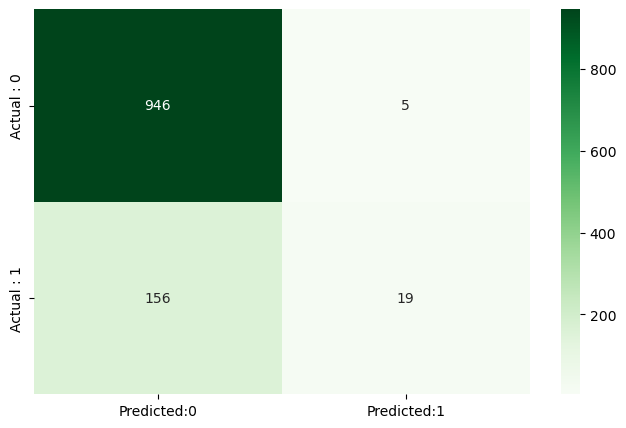

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       951
           1       0.79      0.11      0.19       175

    accuracy                           0.86      1126
   macro avg       0.83      0.55      0.56      1126
weighted avg       0.85      0.86      0.81      1126



In [18]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index = ['Actual : 0', 'Actual : 1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens" )
plt.show()

print('The details for confusion matrix is =')
print(classification_report(y_test, y_pred))

# Performing Support Vector Machine Analysis (SVM)

In [19]:
train_set, test_set = train_test_split(disease_df, test_size = 0.2, random_state = 42)

In [20]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values


In [21]:
# Create a numeric pipeline
num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"])),
    ("imputer", SimpleImputer(strategy="median"))
])


In [22]:
num_pipeline.fit_transform(train_set)

array([[ 41.  ,   0.  , 317.  , ...,  35.42,  68.  ,  87.  ],
       [ 43.  ,  35.  , 207.  , ...,  24.42,  60.  , 100.  ],
       [ 37.  ,   9.  , 237.  , ...,  19.68,  67.  ,  83.  ],
       ...,
       [ 42.  ,   9.  , 218.  , ...,  23.48,  65.  ,  71.  ],
       [ 62.  ,   0.  , 309.  , ...,  28.55,  64.  ,  71.  ],
       [ 45.  ,   5.  , 268.  , ...,  34.27,  85.  ,  93.  ]])

In [23]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X = pd.DataFrame(X)  # Convert X to a DataFrame
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self

    def transform(self, X, y=None):
        X = pd.DataFrame(X)  # Convert X to a DataFrame
        return X.fillna(self.most_frequent_)


In [24]:
# Create a categorical pipeline
cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["Sex_male", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp"])),
    ("imputer", MostFrequentImputer()),
    ("cat_encoder", OneHotEncoder(sparse = False)),    
])

In [25]:
cat_pipeline.fit_transform(train_set)

C:\Users\syeda\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [26]:
preprocess_pipeline = FeatureUnion(transformer_list = [
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    
])

In [27]:
X_train = preprocess_pipeline.fit_transform(train_set)
X_train

C:\Users\syeda\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 41.,   0., 317., ...,   0.,   0.,   1.],
       [ 43.,  35., 207., ...,   0.,   1.,   0.],
       [ 37.,   9., 237., ...,   0.,   1.,   0.],
       ...,
       [ 42.,   9., 218., ...,   0.,   1.,   0.],
       [ 62.,   0., 309., ...,   0.,   0.,   1.],
       [ 45.,   5., 268., ...,   0.,   0.,   1.]])

In [28]:
y_train = train_set["TenYearCHD"]
y_train

2532    0
546     0
2465    0
3741    0
1998    0
       ..
1265    0
1449    0
963     0
3973    1
3594    0
Name: TenYearCHD, Length: 3000, dtype: int64

In [29]:
svm_clf = SVC(gamma = "auto")
svm_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [30]:
X_test = preprocess_pipeline.transform(test_set)
y_pred = svm_clf.predict(X_test)

In [31]:
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv = 10)
svm_scores.mean()

0.8523333333333334

In [32]:
forest_clf = RandomForestClassifier(n_estimators = 50, random_state = 42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv = 10)
forest_scores.mean()

0.8493333333333334

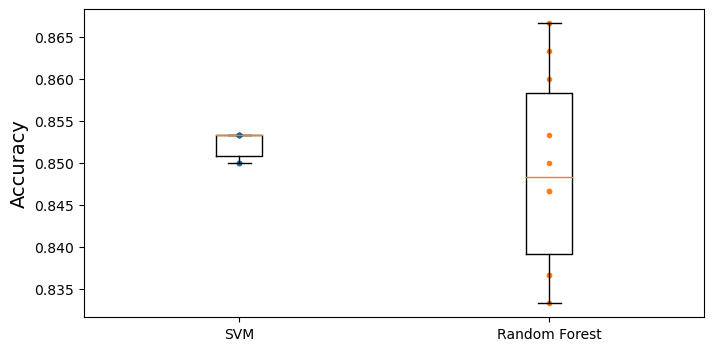

In [33]:
plt.figure(figsize=(8,4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels = ("SVM", "Random Forest"))
plt.ylabel("Accuracy", fontsize = 14)
plt.show()

In [34]:
train_set["AgeBracket"] = train_set["age"] // 5*5
train_set[["AgeBracket", "TenYearCHD"]].groupby(['AgeBracket']).mean()

,TenYearCHD
AgeBracket,
30,0.000000
35,0.041995
40,0.073955
45,0.117647
50,0.166667
55,0.227991
60,0.252055
65,0.336134
70,0.000000


In [35]:
# Now if we suppose we go to the initial dataset suppose the patient is 50 years old and is considered a male education = 3 they are a smoker and smokes 30 cigarettes a day
disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'BPMeds', 'sysBP', 'glucose', 'diaBP', 'prevalentStroke', 'prevalentHyp', 'diabetes']] ## add more columns as needed

,age,Sex_male,cigsPerDay,totChol,BPMeds,sysBP,glucose,diaBP,prevalentStroke,prevalentHyp,diabetes
0,39,1,0.0,195.0,0.0,106.0,77.0,70.0,0,0,0
1,46,0,0.0,250.0,0.0,121.0,76.0,81.0,0,0,0
2,48,1,20.0,245.0,0.0,127.5,70.0,80.0,0,0,0
3,61,0,30.0,225.0,0.0,150.0,103.0,95.0,0,1,0
4,46,0,23.0,285.0,0.0,130.0,85.0,84.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1,1.0,313.0,0.0,179.0,86.0,92.0,0,1,0
4234,51,1,43.0,207.0,0.0,126.5,68.0,80.0,0,0,0
4237,52,0,0.0,269.0,0.0,133.5,107.0,83.0,0,0,0
4238,40,1,0.0,185.0,0.0,141.0,72.0,98.0,0,1,0


# Applying Disease Prediction Using Trained Model

In [36]:
print("### Test Data Input ###")
age = input("Your age? : ")
Sex = input("Are you a male or female? (1: male, 0: female): ")
cigsPerDay = input("How many cigarettes do you smoke per day?: ")
totChol = input("What is your total cholesterol level? : ")
BPMeds = input("Do you take medications to lower your blood pressure? (1: yes, 0: no) : ")
sysBP = input("What is your systolic blood pressure? : ")
disBP = input("What is your diastolic blood pressure? : ")
glucose = input("What is your glucose level? : ")
prevalentStroke = input("Have you ever had a stroke? (1: yes, 0: no): ")
prevalentHyp = input("Do you have hypertension? (1: yes, 0: no): ")
diabetes = input("Do you have diabetes? (1: yes, 0: no): ")

X_new = np.asarray([[age, Sex, cigsPerDay, totChol, BPMeds, sysBP, glucose, disBP, prevalentStroke, prevalentHyp, diabetes]])
X_new_scaled = scaler.transform(X_new)
prediction = logreg.predict(X_new_scaled)

if prediction[0] == 0:
    print("Prediction Result: You have a low risk of having a cardiovascular disease in 10 years.\n")
else:
    print("Prediction Result: You have a high risk of having a cardiovascular disease in 10 years. A further check-up is needed. \n")


### Test Data Input ###
Your age? : 55
Are you a male or female? (1: male, 0: female): 1
How many cigarettes do you smoke per day?: 15
What is your total cholesterol level? : 313
Do you take medications to lower your blood pressure? (1: yes, 0: no) : 1
What is your systolic blood pressure? : 150
What is your diastolic blood pressure? : 98
What is your glucose level? : 107
Have you ever had a stroke? (1: yes, 0: no): 1
Do you have hypertension? (1: yes, 0: no): 1
Do you have diabetes? (1: yes, 0: no): 1
Prediction Result: You have a high risk of having a cardiovascular disease in 10 years. A further check-up is needed. @@@

